## GridDynamics draft

In [1]:
def sequence_validator(brackets_sequence):        
    buff, brackets_dict = [], dict(zip(('({['), (')}]'))) 
    for bracket in brackets_sequence: 
        if bracket in brackets_dict: 
            buff.append(bracket) 
        elif len(buff)==0 or brackets_dict[buff.pop()] != bracket: 
            return False
    return len(buff)==0

In [150]:
string = "()[]}"
print(string, "-", sequence_validator(string)) 

()[]} - False


In [143]:
def brackets_seq_validator(brackets_sequence):
    """
    :param brackets_sequence (string): string of brackets without separators or whitespace  
    :return (string): 'correct' or 'incorrect' result of sequence validation
    """
    result = ['incorrect', 'correct']
    buffer, brackets_dict = [], dict(zip(('({['), (')}]')))
    for bracket in brackets_sequence:
        if bracket in brackets_dict:
            buffer.append(bracket)
        elif not buffer or brackets_dict[buffer.pop()] != bracket:
            return result[False]
    return result[not buffer]

In [151]:
is_valid_parenthese(string)

'incorrect'

## Drons

1. Входят координаты грида
2. Определяется K (для начала const), число кластеров для облета (определяется кастомным k-means)
3. После расчета K, определяем равноудаленную от всех центроидов точку, для расположения машины

In [1]:
def generate_nodes(**kwargs):
    """"""
    import matplotlib.pyplot as plt
    import matplotlib.patches
    import numpy as np

    el = matplotlib.patches.Ellipse((50,-23), 10, 13.7, 20, facecolor=(1,0,0,.2), edgecolor='none')

    y_int = np.arange(-30, -15)
    x_int = np.arange(40, 60)

    g = np.meshgrid(x_int, y_int)
    coords = list(zip(*(c.flat for c in g)))

    ellipsepoints = np.vstack([p for p in coords if el.contains_point(p, radius=0)])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.add_artist(el)
    ep = np.array(ellipsepoints)
    ax.plot(ellipsepoints[:,0], ellipsepoints[:,1], 'go')
    plt.ylim(-31, -15)
    plt.grid()
    plt.show()

    return ellipsepoints

def generate_clusters(ellipsepoints):
    from sklearn.cluster import KMeans
    from collections import defaultdict
    kmeans = KMeans(n_clusters=5, random_state=666)
    kmeans.fit(ellipsepoints)
    labels = kmeans.labels_
    new_grids = defaultdict(list)
    for i, label in enumerate(labels):
        new_grids[label].append(list(ellipsepoints[i]))
        
    return new_grids

def plot_new_grids(new_grids):
    import matplotlib.pyplot as plt
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for key, value in new_grids.items():
        x_list, y_list = [], []

        for x, y in value:
            x_list.append(x)
            y_list.append(y)

        plt.grid()
        plt.plot(x_list,y_list, f'{colors[key]}o')
        
    return 'Done'

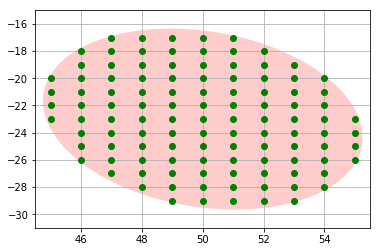

In [3]:
ellipsepoints = generate_nodes()

In [5]:
new_grids = generate_clusters(ellipsepoints)

'Done'

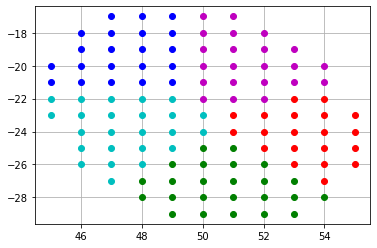

In [493]:
plot_new_grids(new_grids)

## Keywords query parser

In [671]:
import re

In [137]:
q = '1(Короновирус | Пандемия) AND 2(Министерство | ВОЗ | Здравоохранение) AND 1(Казахстан)'

In [913]:
q.split(' AND ')

['1(Короновирус | Пандемия)',
 '2(Министерство | ВОЗ | Здравоохранение)',
 '1(Казахстан)']

In [906]:
todo = '1(|) AND 2(1(|||) | 3(||||||) | 4(|||||) | 3(||||||||||||)) AND 2(||)'

In [966]:
def isinstance_validator(array):
    if isinstance(array, list):
        return array[0]
    else:
        return array

In [967]:
isinstance_validator(1)

1

In [938]:
'20(1(|||) | 3(||||||) | 4(|||||) | 3(||||||||||||))'.find('(', 1, -1)

2

In [960]:
s = '20(|||) | 3(||||||) | 4(|||||) | 3(||||||||||||))'

In [961]:
depth = True if re.findall('\D', s)[:2].count('(')-1 else False

In [962]:
depth

False

In [955]:
all(['(',')'])

True

In [945]:
first

2

In [946]:
'20(10(|||) | 3(||||||) | 4(|||||) | 3(||||||||||||))'.find('(', 3, -1)

5

In [911]:
for l in '1(Казахстан)'.split(' AND '):
    print(parse_q(l))

!!! input 1(Казахстан)
!!! nums  ['1']
Q 1(Казахстан) on ['1']
Done


In [912]:
'1(Казахстан)'.split(' AND ')

['1(Казахстан)']

In [916]:
re.findall('(?<=\().+?(?=\))',\
           '1(Короновирус | Пандемия) AND 2(Министерство | ВОЗ | Здравоохранение) AND 1(Казахстан)'.split(' AND ')[-1])

['Казахстан']

In [917]:
re.findall('(?<=\().+?(?=\))','1(Короновирус | Пандемия) | 2(Министерство | ВОЗ | Здравоохранение) | 1(Казахстан)')

['Короновирус | Пандемия', 'Министерство | ВОЗ | Здравоохранение', 'Казахстан']

In [822]:
todo.split(' AND ')[1]

'2(1(|||) | 3(||||||) | 4(|||||) | 3(||||||||||||))'

In [908]:
def parse_q(s):
    import re
    print('!!! input', s)
    nums = re.findall('\d(?![^(]*\))', s)
    print('!!! nums ', nums)
    if len(nums)>1:
        
        start_idx = s.find('(') + 1
        s = re.findall('(?<=\().+?(?=\))', s[start_idx:-1])
        print('!!! s', s)
        minimum_should_match_first = nums[0]
        del nums[0]
        el_list = list()
        assert len(nums)==len(s)
        for el, num in zip(s, nums):
            el_list.append(create_elementary_q(el, num))
        print(f'{agregate_q_list(el_list)}')
        return 'Done'
    
    print(create_elementary_q(s, nums))
    return 'Done'

In [ ]:
def 

In [901]:
def create_elementary_q(el, num):
    return f'Q {el} on {num}'

In [900]:
def agregate_q_list(q_list):
    return f'list on Qs {q_list}'

In [893]:
parse_q('1(|||)')

!!! input 1(|||)
!!! nums  ['1']
Q 1(|||) on ['1']


'Done'

## Recnum experiments

In [9]:
import os
from datetime import datetime

In [17]:
datetime.strptime('2019-10-05', '%Y-%m-%d').date() < datetime.strptime('2020-10-05', '%Y-%m-%d').date()

True

In [23]:
sorted(['2019-05-10', '2020-01-10', '2020-01-11', '2019-05-11'], reverse=True)

['2020-01-11', '2020-01-10', '2019-05-11', '2019-05-10']

In [27]:
for file in os.listdir(path='./data_folder'):
    if file.endswith('.csv') and file.split('_')[0] == 'checks':
        print(file.split('_'))

['checks', '2018-05-05', '2019-10-05', '555678', 'rows.csv']
['checks', '2018-02-05', '2019-01-05', '555678', 'rows.csv']


In [45]:
os.listdir('./data_folder')

['products_2019-01-05_201000_rows.csv',
 'stores_2019-01-05_57_rows.csv',
 '.ipynb_checkpoints',
 'checks_2017-05-05_2019-10-05_555678_rows.csv',
 'checks_2018-02-05_2019-01-05_555678_rows.csv']

In [65]:
sorted([file for file in os.listdir(path='./data_folder') \
        if file.endswith('.csv') and file.split('_')[0] == 'checks'],key= lambda data: data.split('_')[2], reverse=True)[0]

'checks_2017-05-05_2019-10-05_555678_rows.csv'

In [67]:
for file in os.listdir('./data_folder/'):
    print(file.split('_'))

['products', '2019-01-05', '201000', 'rows.csv']
['stores', '2019-01-05', '57', 'rows.csv']
['.ipynb', 'checkpoints']
['checks', '2017-05-05', '2019-10-05', '555678', 'rows.csv']
['checks', '2018-02-05', '2019-01-05', '555678', 'rows.csv']


In [66]:
os.listdir('./data_folder/')

['products_2019-01-05_201000_rows.csv',
 'stores_2019-01-05_57_rows.csv',
 '.ipynb_checkpoints',
 'checks_2017-05-05_2019-10-05_555678_rows.csv',
 'checks_2018-02-05_2019-01-05_555678_rows.csv']

In [71]:
import subprocess

In [73]:
cd data_folder/


/home/s.murzakhmetov/data_folder


In [74]:
ls

checks_2017-05-05_2019-10-05_555678_rows.csv
checks_2018-02-05_2019-01-05_555678_rows.csv
products_2019-01-05_201000_rows.csv
stores_2019-01-05_57_rows.csv


In [77]:
!wc -l stores_2019-01-05_57_rows.csv

0 stores_2019-01-05_57_rows.csv


In [80]:
subprocess.check_output(["wc", "-l" , "stores_2019-01-05_57_rows.csv"]).split()[0]

b'0'

In [82]:
'stores_2019-01-05_57_rows.csv'.split('_')[-2]

'57'

In [ ]:
os.rename(f'{sorted([file for file in os.listdir(path='./data_folder') \
        if file.endswith('.csv') and file.split('_')[0] == 'checks'],key= lambda data: data.split('_')[2], reverse=True)[0]}',\
          f'{os.listdir}')

In [63]:
for item in os.listdir('./data_folder'):
    if item.endswith('.old'):
        os.rename(f'/home/s.murzakhmetov/data_folder/{item}', f'/home/s.murzakhmetov/data_folder/{item}' +'old')

In [64]:
os.listdir('./data_folder')

['checks_2018-02-05_2019-01-05_555678_rows.oldold',
 'products_2019-01-05_201000_rows.oldold',
 '.ipynb_checkpoints',
 'checks_2017-05-05_2019-10-05_555678_rows.oldold',
 'stores_2019-01-05_57_rows.asd']

In [56]:
pwd

'/home/s.murzakhmetov'

In [52]:
os.listdir('./data_folder')

['products_2019-01-05_201000_rows.csv',
 '.ipynb_checkpoints',
 'checks_2017-05-05_2019-10-05_555678_rows.csv',
 'checks_2018-02-05_2019-01-05_555678_rows.csv',
 'stores_2019-01-05_57_rows.asd']

In [1]:
a = {'a':[1,2,3,4], 'b':[], 'c': [1,2,3,4,5,6,7]}

In [2]:
for key, val in a.items():
    if len(val)<1:
        del a[key]

RuntimeError: dictionary changed size during iteration

## Shit Experiments

In [8]:
import pandas as pd
import numpy as np

In [72]:
a = {'a':[1,2,3,4,0], 'b':[7,8,1,10,1], 'c': [66,20,11,4,9]}

In [73]:
df = pd.DataFrame(data=a)

In [27]:
df.apply(np.mean, axis=1)

0    24.666667
1    10.000000
2     5.000000
3     6.000000
4    34.333333
dtype: float64

In [74]:
for i, row in enumerate(df.itertuples()):
    row_sum = 0
    not_zero_cnt = 0
    for val in row[1:]:
        if val:
            row_sum += val
            not_zero_cnt += 1
    print(row_sum / not_zero_cnt, i)

24.666666666666668 0
10.0 1
5.0 2
6.0 3
5.0 4


In [70]:
df[df!=0].mean(axis=1)

0    24.666667
1    10.000000
2     5.000000
3     6.000000
4          NaN
dtype: float64

In [77]:
labels_list = ['tm_0-topic_1', 'tm_0-topic_11', 'tm_0-topic_13', 'tm_0-topic_14', 'tm_0-topic_15', 'tm_0-topic_16', 'tm_0-topic_17', 'tm_0-topic_18', 'tm_0-topic_19', 'tm_0-topic_2', 'tm_0-topic_20', 'tm_0-topic_21', 'tm_0-topic_22', 'tm_0-topic_23', 'tm_0-topic_24', 'tm_0-topic_25', 'tm_0-topic_26', 'tm_0-topic_28', 'tm_0-topic_29', 'tm_0-topic_3', 'tm_0-topic_30', 'tm_0-topic_31', 'tm_0-topic_32', 'tm_0-topic_33', 'tm_0-topic_35', 'tm_0-topic_36', 'tm_0-topic_37', 'tm_0-topic_39', 'tm_0-topic_4', 'tm_0-topic_40', 'tm_0-topic_41', 'tm_0-topic_42', 'tm_0-topic_43', 'tm_0-topic_44', 'tm_0-topic_45', 'tm_0-topic_46', 'tm_0-topic_47', 'tm_0-topic_49', 'tm_0-topic_5', 'tm_0-topic_6', 'tm_0-topic_7', 'tm_0-topic_8', 'tm_0-topic_9', 'tm_1-topic_0', 'tm_1-topic_1', 'tm_1-topic_10', 'tm_1-topic_11', 'tm_1-topic_12', 'tm_1-topic_13', 'tm_1-topic_14', 'tm_1-topic_15', 'tm_1-topic_16', 'tm_1-topic_17', 'tm_1-topic_18', 'tm_1-topic_19', 'tm_1-topic_2', 'tm_1-topic_20', 'tm_1-topic_21', 'tm_1-topic_22', 'tm_1-topic_23', 'tm_1-topic_24', 'tm_1-topic_25', 'tm_1-topic_26', 'tm_1-topic_27', 'tm_1-topic_28', 'tm_1-topic_29', 'tm_1-topic_3', 'tm_1-topic_30', 'tm_1-topic_31', 'tm_1-topic_32', 'tm_1-topic_33', 'tm_1-topic_34', 'tm_1-topic_35', 'tm_1-topic_36', 'tm_1-topic_37', 'tm_1-topic_38', 'tm_1-topic_39', 'tm_1-topic_4', 'tm_1-topic_40', 'tm_1-topic_41', 'tm_1-topic_42', 'tm_1-topic_43', 'tm_1-topic_44', 'tm_1-topic_45', 'tm_1-topic_46', 'tm_1-topic_47', 'tm_1-topic_48', 'tm_1-topic_49', 'tm_1-topic_5', 'tm_1-topic_6', 'tm_1-topic_7', 'tm_1-topic_8', 'tm_1-topic_9', 'tm_2-topic_0', 'tm_2-topic_1', 'tm_2-topic_10', 'tm_2-topic_11', 'tm_2-topic_12', 'tm_2-topic_13', 'tm_2-topic_14', 'tm_2-topic_15', 'tm_2-topic_16', 'tm_2-topic_17', 'tm_2-topic_18', 'tm_2-topic_19', 'tm_2-topic_2', 'tm_2-topic_20', 'tm_2-topic_21', 'tm_2-topic_22', 'tm_2-topic_23', 'tm_2-topic_24', 'tm_2-topic_25', 'tm_2-topic_26', 'tm_2-topic_27', 'tm_2-topic_28', 'tm_2-topic_29', 'tm_2-topic_3', 'tm_2-topic_30', 'tm_2-topic_31', 'tm_2-topic_32', 'tm_2-topic_33', 'tm_2-topic_34', 'tm_2-topic_35', 'tm_2-topic_36', 'tm_2-topic_37', 'tm_2-topic_38', 'tm_2-topic_39', 'tm_2-topic_4', 'tm_2-topic_40', 'tm_2-topic_41', 'tm_2-topic_42', 'tm_2-topic_43', 'tm_2-topic_44', 'tm_2-topic_45', 'tm_2-topic_46', 'tm_2-topic_47', 'tm_2-topic_48', 'tm_2-topic_49', 'tm_2-topic_5', 'tm_2-topic_6', 'tm_2-topic_7', 'tm_2-topic_8', 'tm_2-topic_9', 'tm_3-topic_0', 'tm_3-topic_1', 'tm_3-topic_10', 'tm_3-topic_11', 'tm_3-topic_12', 'tm_3-topic_13', 'tm_3-topic_14', 'tm_3-topic_15', 'tm_3-topic_16', 'tm_3-topic_17', 'tm_3-topic_18', 'tm_3-topic_19', 'tm_3-topic_2', 'tm_3-topic_20', 'tm_3-topic_21', 'tm_3-topic_22', 'tm_3-topic_23', 'tm_3-topic_24', 'tm_3-topic_25', 'tm_3-topic_26', 'tm_3-topic_27', 'tm_3-topic_28', 'tm_3-topic_29', 'tm_3-topic_3', 'tm_3-topic_30', 'tm_3-topic_31', 'tm_3-topic_32', 'tm_3-topic_33', 'tm_3-topic_34', 'tm_3-topic_35', 'tm_3-topic_36', 'tm_3-topic_37', 'tm_3-topic_38', 'tm_3-topic_39', 'tm_3-topic_4', 'tm_3-topic_40', 'tm_3-topic_41', 'tm_3-topic_42', 'tm_3-topic_43', 'tm_3-topic_44', 'tm_3-topic_45', 'tm_3-topic_46', 'tm_3-topic_48', 'tm_3-topic_49', 'tm_3-topic_5', 'tm_3-topic_6', 'tm_3-topic_7', 'tm_3-topic_8', 'tm_3-topic_9', 'tm_4-topic_0', 'tm_4-topic_10', 'tm_4-topic_11', 'tm_4-topic_12', 'tm_4-topic_13', 'tm_4-topic_14', 'tm_4-topic_15', 'tm_4-topic_16', 'tm_4-topic_17', 'tm_4-topic_18', 'tm_4-topic_19', 'tm_4-topic_2', 'tm_4-topic_20', 'tm_4-topic_21', 'tm_4-topic_22', 'tm_4-topic_24', 'tm_4-topic_25', 'tm_4-topic_26', 'tm_4-topic_27', 'tm_4-topic_28', 'tm_4-topic_29', 'tm_4-topic_3', 'tm_4-topic_30', 'tm_4-topic_31', 'tm_4-topic_32', 'tm_4-topic_33', 'tm_4-topic_34', 'tm_4-topic_35', 'tm_4-topic_36', 'tm_4-topic_37', 'tm_4-topic_38', 'tm_4-topic_39', 'tm_4-topic_4', 'tm_4-topic_40', 'tm_4-topic_41', 'tm_4-topic_42', 'tm_4-topic_44', 'tm_4-topic_46', 'tm_4-topic_47', 'tm_4-topic_48', 'tm_4-topic_49', 'tm_4-topic_5', 'tm_4-topic_6', 'tm_4-topic_7', 'tm_4-topic_8', 'tm_4-topic_9'] 

In [106]:
x = []
for i in labels_list:
    if i.split('-')[0].split('_')[1]=='0':
        x.append(0.1)
    elif i.split('-')[0].split('_')[1]=='1':
        x.append(0.3)
    elif i.split('-')[0].split('_')[1]=='2':
        x.append(0.5)
    elif i.split('-')[0].split('_')[1]=='3':
        x.append(0.7)
    else:
        x.append(0.9)

In [113]:
labels_list[source[0]]

'tm_0-topic_1'

In [114]:
a = [1,3,4,5]

### Contextlib

In [118]:
from contextlib import contextmanager

In [119]:
@contextmanager

def simple_cont_manager(obj):
    try:
        obj.some_property+=1
        yield
    finally:
        obj.some_property-=1

In [120]:
class Some_obj(object):
    def __init__(self, arg):
        self.some_property = arg

In [122]:
obj = Some_obj(6)

In [128]:
with simple_cont_manager(obj):
    print(obj.some_property)

7


In [129]:
with simple_cont_manager(obj):
    print(obj.some_property)

7
